# **Тема 7. Исследование зависимости плотности от параметров НСВ в Python**

Изучите материал из Notebook «Исследование зависимости плотности от параметров НСВ». Повторите примеры с исследованием поведения графика плотности от значений параметров НСВ для равномерного, экспоненциального, нормального законов распределения и проверку формул расчета математического ожидания и дисперсии для сгенерированных данных. Самостоятельно исследуйте поведение графика и расчет характеристик для другого вида непрерывного распределения (например, логнормальное, χ2-распределение, распределение Стьюдента, Фишера-Снедекора, см. Кремер §§ 4.8 – 4.9, https://docs.scipy.org/doc/scipy/reference/stats.html). Для рассматриваемого распределения оформите теоретическую часть (вставьте пояснения и расчетные формулы).


## **Повторение примеров**

In [6]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [45]:
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):

    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1
    plt.figure(figsize=(6, 3))
    plt.plot(X, Y, lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)
    plt.xlim((xmin, xmax))
    plt.ylim((-0.05, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=14)
    plt.show()


### **Равномерное непрерывное распределение**

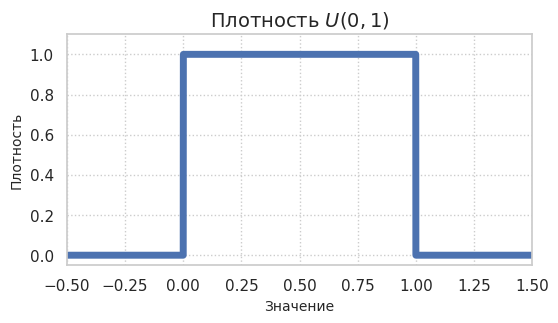

In [8]:
show_pdf(
    pdf=sts.uniform.pdf, xmin=-0.5, xmax=1.5, grid_size=10000,
    distr_name=r'$U(0, 1)$', loc=0, scale=1
)

In [12]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.uniform.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
                                value=100, description='$grid/size$'),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1, value=1,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1, value=10,
                                description='$x_{max}=$'),
    loc=widgets.FloatSlider(min=1, max=15, step=0.01, value=3,
                                description='$a=$'),
    scale=widgets.FloatSlider(min=0.5, max=10, step=0.01, value=1,
                                description='$b - a=$'),
    distr_name=r'$U$({loc:.2f}, {loc:.2f} + {scale:.2f})',
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()


In [13]:
def plot_uniform(a=0, b=1, n_points=1000):
    plt.figure(figsize=(6, 3))
    sample = sts.uniform.rvs(loc=a, scale=b - a, size=n_points)
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(a - (b - a) / 6, b + (b - a) / 6, n_points)
    plt.plot(grid, sts.uniform.pdf(grid, a, b - a), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Случайная величина $X \sim \mathcal{R}$(a, b)', fontsize=14)
    plt.legend(fontsize=10, loc=8)
    plt.grid(ls=':')
    plt.show()

    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round((a + b) / 2, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round((b - a) ** 2 / 12, 3)}')

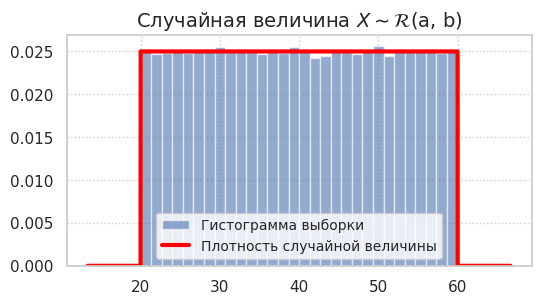

Математическое ожидание: 39.995, а по формуле: 40.0
Дисперсия: 133.531, а по формуле: 133.333


In [20]:
plot_uniform(20, 60, 100000)

### **Экспоненциальное распределение**

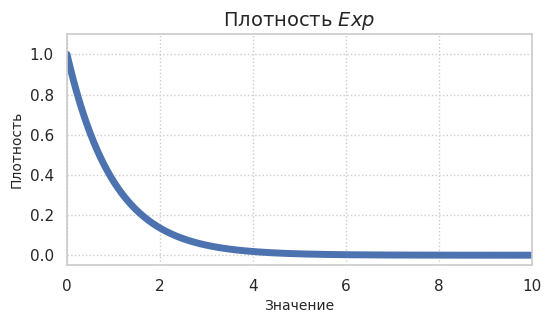

In [21]:
show_pdf(
    pdf=sts.expon.pdf, xmin=0, xmax=10, grid_size=10000,
    distr_name=r'$Exp$', scale=1
)

In [28]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.expon.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description=r'$grid\_size$'),
    xmin=widgets.FloatSlider(min=0, max=20, step=0.1, value=0,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1, value=10,
                                description='$x_{max}=$'),
    scale=widgets.FloatSlider(min=0, max=5, step=0.1, value=1,
                                description=r'$1 / \lambda=$'),
    distr_name=r'$Exp$({scale:.2f})',
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()


In [33]:
def plot_exp(lmbd=1, n_points=100_000):
    plt.figure(figsize=(6, 3))
    sample = sts.expon.rvs(scale=1 / lmbd, size=n_points)
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(0, 10, n_points)
    plt.plot(grid, sts.expon.pdf(grid, scale=1 / lmbd), color='red', lw=3,
             label='Плотность случайной величины')
    plt.legend(fontsize=10, loc=0)
    plt.grid(ls=':')
    plt.show()

    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round(1 / lmbd, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round(1 / lmbd ** 2, 3)}')

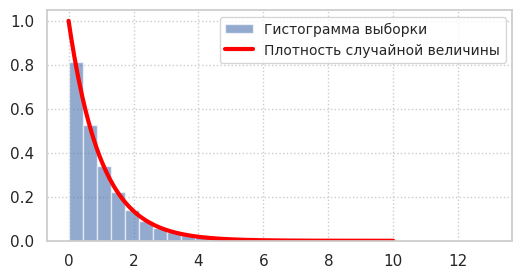

Математическое ожидание: 0.997, а по формуле: 1.0
Дисперсия: 0.992, а по формуле: 1.0


In [34]:
plot_exp()

### **Нормальное распределение**

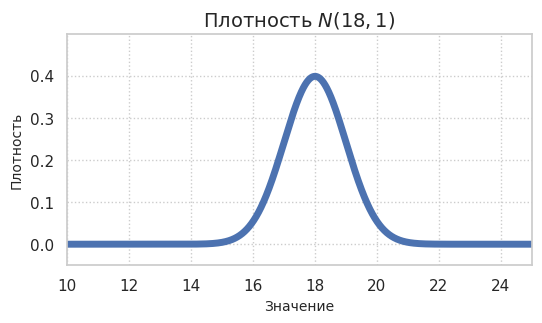

In [35]:
show_pdf(
    pdf=sts.norm.pdf, xmin=10, xmax=25, grid_size=10000,
    distr_name=r'$N(18, 1)$', loc=18, scale=1
)

In [41]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.norm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description=r'$grid\_size$'),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1, value=0,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=5, max=20, step=0.1, value=15,
                                description='$x_{max}=$'),
    loc=widgets.FloatSlider(min=-1, max=25, step=0.1, value=10,
                                description='$a=$'),
    scale=widgets.FloatSlider(min=0.01, max=10, step=0.01, value=1,
                                description=r'$\sigma=$'),
    distr_name=r'$N$({loc:.2f}, {scale:.2f})',
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()

In [43]:
def plot_norm(a=0, sigma=1, n_points=10000):
    plt.figure(figsize=(6, 3))
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n_points)
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)
    plt.plot(grid, sts.norm.pdf(grid, a, sigma), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Нормальная величина $X \sim \mathcal{N}$', fontsize=14)
    plt.legend(fontsize=8, loc=8)
    plt.grid(ls=':')
    plt.show()

    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round(a, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round(sigma ** 2, 3)}')

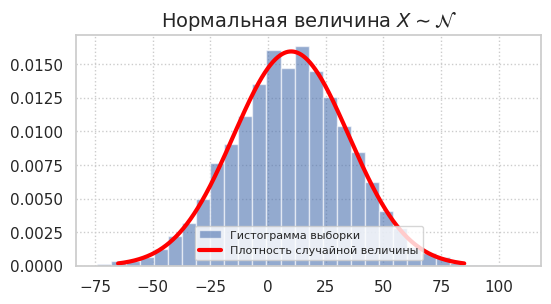

Математическое ожидание: 9.951, а по формуле: 10
Дисперсия: 625.823, а по формуле: 625


In [44]:
plot_norm(10, 25)

## **Логнормальное распределение (самостоятельно)**

### **Теоретическая часть**

>**Определение.** Непрерывная случайная величина $ X $ имеет *логарифмически-нормальное распределение* (или *логнормальное распределение*), если её логарифм $ \ln X $ подчиняется нормальному закону распределения с параметрами $ \mu $ и $ \sigma^2 $: $$
\ln X \sim \mathcal{N}(\mu, \sigma^2).
$$

Так как при $ x > 0 $ неравенства $ X < x $ и $ \ln X < \ln x $ равносильны, то функция распределения логнормального закона совпадает с функцией распределения нормального закона для случайной величины $ \ln X $:

$$
F(x) = \frac{1}{\sigma \sqrt{2\pi}} \int_{-\infty}^{\ln x} e^{-\frac{(t - \mu)^2}{2\sigma^2}} dt
\quad
$$

Выражение плотности вероятности для логнормального распределения имеет вид:

$$
\varphi(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left( -\frac{(\ln x - \mu)^2}{2\sigma^2} \right), \quad x > 0
\quad
$$

Рассмотрим формулы числовых характеристик.

Математическое ожидание:
$$
M(X) = e^{\mu + \frac{\sigma^2}{2}}
$$

Дисперсия:
$$
D(X) = e^{2\mu + \sigma^2} \left( e^{\sigma^2}- 1 \right)
$$

Мода:
$$
Mo(X) = e^{\mu - \sigma^2}
$$

Медиана:
$$
Me(X) = e^{\mu}
$$

Очевидно, чем меньше $ \sigma $, тем ближе друг к другу значения моды, медианы и математического ожидания, а кривая распределения становится ближе к симметричной.

Если в нормальном законе параметр $ \mu $ выступает в качестве среднего значения случайной величины, то в логнормальном — в качестве **медианы**.

График плотности логнормального распределения всегда асимметричен вправо. При малых $ \sigma $ он напоминает "колокол", но с заметным смещением вправо. С увеличением $ \sigma $ асимметрия усиливается, пик становится ниже и сдвигается влево относительно среднего.

В **SciPy** логнормальное распределение реализовано как `scipy.stats.lognorm`. Оно параметризуется:
- `s` — параметр формы, равный $ \sigma $;
- `scale` — масштаб, равный $ e^\mu $;
- `loc` — сдвиг (обычно `loc = 0`).

Плотность распределения вычисляется как  
$$
f(x) = \texttt{lognorm.pdf}(x, s=\sigma, \texttt{scale}=e^\mu).
$$

Математическое ожидание и дисперсия могут быть получены через метод `.stats()`.


### **Практическая часть**

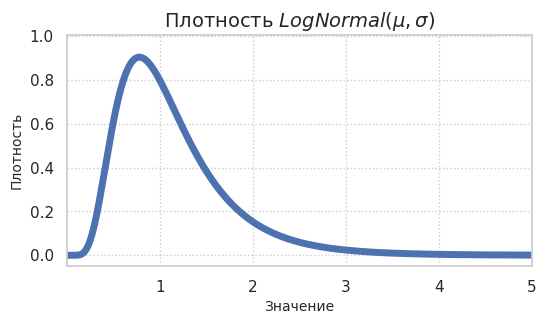

In [58]:
show_pdf(
    pdf=sts.lognorm.pdf,
    xmin=0.001, xmax=5, grid_size=10000,
    distr_name=r'$LogNormal(\mu,\sigma)$',
    s=0.5,
    scale=np.exp(0)
)

In [64]:
ip_ln = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.lognorm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description='grid/size'),
    xmin=widgets.FloatSlider(min=0.001, max=2, step=0.01, value=0.01,
                             description='x_min'),

    xmax=widgets.FloatSlider(min=1, max=10, step=0.1, value=5,
                             description='x_max'),
    s=widgets.FloatSlider(min=0.1, max=2, step=0.01, value=0.5,
                          description=r'$\sigma$'),

    scale=widgets.FloatSlider(min=0.1, max=10, step=0.01, value=1,
                              description=r'$e^\mu$'),
    distr_name=widgets.fixed(r'$LogNormal(\mu,\sigma)$')
)

display(widgets.VBox(ip_ln.children))

ip_ln.update()

In [70]:
def plot_lognormal(mu=0, sigma=0.5, n_points=1000):
    plt.figure(figsize=(6, 3))
    sample = sts.lognorm.rvs(s=sigma,scale=np.exp(mu),size=n_points)
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(0.001, np.percentile(sample, 99.5), n_points)
    plt.plot(grid, sts.lognorm.pdf(grid, s=sigma, scale=np.exp(mu)),
             lw=3, color='red',label='Плотность распределения')
    plt.title(r'$X \sim LogNormal(\mu,\sigma)$', fontsize=14)
    plt.legend()
    plt.grid(ls=':')
    plt.show()

    theo_mean = np.exp(mu + sigma**2 / 2)
    theo_var = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)

    print(f'Математическое ожидание: {sample.mean():.3f}, '
          f'по формуле: {theo_mean:.3f}')
    print(f'Дисперсия: {sample.var():.3f}, '
          f'по формуле: {theo_var:.3f}')

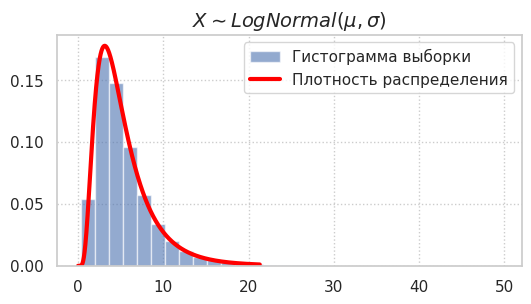

Математическое ожидание: 5.367, по формуле: 5.366
Дисперсия: 12.551, по формуле: 12.475


In [71]:
plot_lognormal(mu=1.5, sigma=0.6, n_points=100000)